In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#loading the entire excel workbook and later loading all the sheets into seperate dataframes
url = 'https://docs.google.com/spreadsheets/d/1iqU-13-zulxKfd8fEseiyvaDGxe-YStW/export?format=xlsx&id=1iqU-13-zulxKfd8fEseiyvaDGxe-YStW'
all_sheets = pd.read_excel(url, sheet_name=None, engine='openpyxl')

In [ ]:
totbc = all_sheets['TOTBC'] #Loading 'Total Bitcoins' Data
avbls = all_sheets['AVBLS'] #Loading 'Bitcoin Average Block Size' Data
mkpru = all_sheets['MKPRU'] #Loading 'Bitcoin Market Price(USD)' Data
blchs = all_sheets['BLCHS'] #Loading 'Bitcoin API.Blockchain Size' Data
cptra = all_sheets['CPTRA'] #Loading 'Cost per Transaction' Data
cptrv = all_sheets['CPTRV'] #Loading 'Cost % of Total Volume' Data
etrav = all_sheets['ETRAV'] #Loading 'Estimated Transaction Volume' Data
etrvu = all_sheets['ETRVU'] #Loading 'Estimate Transaction Volume(USD)' Data
mirev = all_sheets['MIREV'] #Loading 'Miner's Revenue' Data
mktcp = all_sheets['MKTCP'] #Loading 'Bitcoin Market Capitalisation' Data
ntran = all_sheets['NTRAN'] #Loading 'Bitcoin Number of Transactions' Data
ntrat = all_sheets['NTRAT'] #Loading 'Bitcoin Total Number of Transactions' Data
ntrbl = all_sheets['NTRBL'] #Loading 'Bitcoin Number of Transactions per Block' Data
toutv = all_sheets['TOUTV'] #Loading 'Bitcoin Total Output Volume' Data
trfee = all_sheets['TRFEE'] #Loading 'Bitcoin Total Transaction Fees' Data
trfus = all_sheets['TRFUS'] #Loading 'Bitcoin Total Transaction Fees USD' Data
trvou = all_sheets['TRVOU'] #Loading 'Bitcoin USD Exchange Trade Volume' Data
hrate = all_sheets['HRATE'] #Loading 'Bitcoin Hash Rate' Data
diff = all_sheets['DIFF'] #Loading 'Bitcoin Difficulty' Data

Checking for null values in all the sheets.

In [ ]:
totbc.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
avbls.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
mkpru.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
blchs.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
cptra.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
cptrv.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
etrav.isnull().sum()


,0
code,0
date,0
value,0


In [ ]:
etrvu.isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
mirev .isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
mktcp.isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
ntran.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
ntrat.isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
ntrbl.isnull().sum()


,0
code,0
date,0
value,0


In [ ]:
toutv.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
trfee.isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
trfus.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
trvou.isnull().sum()

,0
code,0
date,0
Year,0
value,0


In [ ]:
hrate.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
diff.isnull().sum()

,0
code,0
date,0
value,0


In [ ]:
cptra # bitcoin cost per transaction

,code,date,value
0,CPTRA,2023-09-12,51.0222
1,CPTRA,2023-09-13,48.3692
2,CPTRA,2023-09-14,47.9000
3,CPTRA,2023-09-15,45.5277
4,CPTRA,2023-09-16,44.6176
...,...,...,...
5656,CPTRA,2023-09-06,46.3663
5657,CPTRA,2023-09-07,45.3674
5658,CPTRA,2023-09-08,54.4809
5659,CPTRA,2023-09-09,42.3005


## Correlational Analysis

In [ ]:
#checking the correlation between Total Bitcoins and Market Capitalisation
correlation = totbc['value'].corr(mktcp['value'])
correlation

0.5629266783344317

A correlation of 0.563 between total bitcoins and market capitalization indicates a moderate positive linear
relationship between the two variables. This means that as the total number
of bitcoins increases, the market capitalization tends to increase as well, but not perfectly.

In [ ]:
#creating a pivot table for total bitcoins aggreagated for each year from 2009 to 2024.
totbc['Year'] = totbc['date'].dt.year
pvt_tbl = pd.pivot_table(totbc, values='value', index='Year', aggfunc='sum')
pvt_tbl

,value
Year,
2009,3.102682e+08
2010,1.202006e+09
2011,2.412184e+09
2012,3.430082e+09
2013,4.154770e+09
2014,4.731324e+09
2015,5.235535e+09
2016,5.725331e+09
2017,5.995057e+09


In [ ]:
#creating a pivot table for market capitalisation aggreagated for each year from 2009 to 2024.
mktcp['Year'] = mktcp['date'].dt.year
pvt_tbl1 = pd.pivot_table(mktcp, values='value', index='Year', aggfunc='sum')
pvt_tbl1

,value
Year,
2009,0.000000e+00
2010,1.055732e+08
2011,1.514322e+10
2012,2.992239e+10
2013,8.222102e+11
2014,2.470421e+12
2015,1.433381e+12
2016,3.263915e+12
2017,2.417277e+13


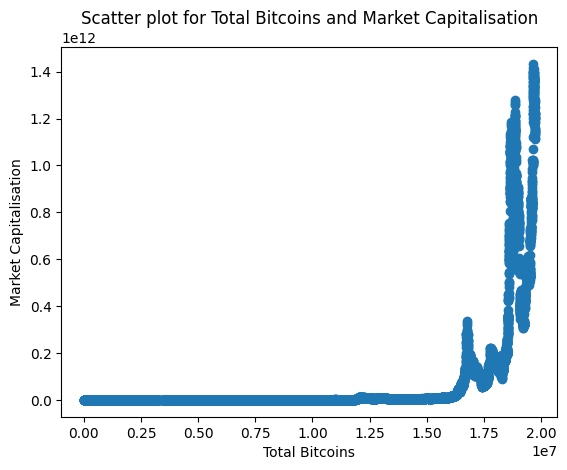

In [ ]:
#scatter plot for total bitcoins and market capitalisation.
plt.scatter(totbc['value'], mktcp['value'])
plt.xlabel('Total Bitcoins')
plt.ylabel('Market Capitalisation')
plt.title('Scatter plot for Total Bitcoins and Market Capitalisation')
plt.show()

Observations:
* The scatter plot suggests a non-linear relationship between total bitcoins and market capitalization.
The majority of data points are clustered at lower total bitcoins values, and as the total bitcoins increase,
the market capitalization increases more rapidly.

* There is a significant clustering of data points at the lower end of the total bitcoins axis.
This indicates that for a substantial range of lower total bitcoins, the market capitalization remains relatively low.
As the total bitcoins approach higher values (closer to 2.0e7), there is a noticeable and rapid increase in market capitalization,
reaching up to approximately 1.4e12.

* This suggests that once the number of bitcoins reaches a certain threshold, the market capitalization starts to grow exponentially.
Given the nature of the data, applying a logarithmic transformation might help in better visualizing and understanding the relationship.
This could linearize the relationship and make it easier to interpret.

* The moderate positive correlation coefficient (0.563) mentioned earlier is supported by this plot.
While the relationship is not perfectly linear,there is a clear trend indicating that as the total bitcoins increase,
the market capitalization tends to increase as well.

In [ ]:
mirev

,code,date,Year,value
0,MIREV,2023-09-12,2023,2.358898e+07
1,MIREV,2023-09-13,2023,2.478660e+07
2,MIREV,2023-09-14,2023,2.760071e+07
3,MIREV,2023-09-15,2023,3.203751e+07
4,MIREV,2023-09-16,2023,2.646464e+07
...,...,...,...,...
5656,MIREV,2023-09-06,2023,2.250423e+07
5657,MIREV,2023-09-07,2023,2.440491e+07
5658,MIREV,2023-09-08,2023,2.259861e+07
5659,MIREV,2023-09-09,2023,2.527070e+07


In [ ]:
#creating pivot table for miner's revenue aggregated for each year from 2009 to 2024.
pivot_table = pd.pivot_table(mirev, values='value', index='Year', aggfunc='sum')
pivot_table

,value
Year,
2009,0.000000e+00
2010,2.231832e+05
2011,1.923294e+07
2012,2.328255e+07
2013,3.307510e+08
2014,8.376645e+08
2015,3.949432e+08
2016,5.699509e+08
2017,3.315541e+09


In [ ]:
#removing all the data for year 2009 since it contains all zeros.
mirev = mirev[mirev['Year'] != 2009]

In [ ]:
mirev

,code,date,Year,value
0,MIREV,2023-09-12,2023,2.358898e+07
1,MIREV,2023-09-13,2023,2.478660e+07
2,MIREV,2023-09-14,2023,2.760071e+07
3,MIREV,2023-09-15,2023,3.203751e+07
4,MIREV,2023-09-16,2023,2.646464e+07
...,...,...,...,...
5656,MIREV,2023-09-06,2023,2.250423e+07
5657,MIREV,2023-09-07,2023,2.440491e+07
5658,MIREV,2023-09-08,2023,2.259861e+07
5659,MIREV,2023-09-09,2023,2.527070e+07


In [ ]:
pivot_table = pd.pivot_table(mirev, values='value', index='Year', aggfunc='sum')
pivot_table

,value
Year,
2010,2.231832e+05
2011,1.923294e+07
2012,2.328255e+07
2013,3.307510e+08
2014,8.376645e+08
2015,3.949432e+08
2016,5.699509e+08
2017,3.315541e+09
2018,5.457482e+09


In [ ]:
trfus['Year'] = trfus['date'].dt.year # adding a year column to the trfus dataframe.
# creating a pivot table for aggregated value of transaction fees for each year from 2009 to 2024.
pivot_table1 = pd.pivot_table(trfus, values='value', index='Year', aggfunc='sum')
pivot_table1

,value
Year,
2009,0.000000e+00
2010,3.081100e+00
2011,3.385293e+04
2012,7.239165e+04
2013,2.226629e+06
2014,2.555546e+06
2015,2.439183e+06
2016,1.369642e+07
2017,5.541707e+08


In [ ]:
#removing all the data for year 2009 since it contains all zeros.
trfus = trfus[trfus['Year'] != 2009]

In [ ]:
pivot_table1 = pd.pivot_table(trfus, values='value', index='Year', aggfunc='sum')
pivot_table1

,value
Year,
2010,3.081100e+00
2011,3.385293e+04
2012,7.239165e+04
2013,2.226629e+06
2014,2.555546e+06
2015,2.439183e+06
2016,1.369642e+07
2017,5.541707e+08
2018,2.868776e+08


In [ ]:
len(trfus)

5297

In [ ]:
len(mirev)

5297

In [ ]:
correlation1 = mirev['value'].corr(trfus['value'])

In [ ]:
correlation1

0.5655120300374722

* A correlation coefficient of 0.5655 between miners revenue and total transaction fees suggests a moderate positive relationship between these two variables where as total transaction fees increase, miners' revenue tends to increase as well.
 Since there is no strong correlation there can be other factors except transaction fees that could be affecting the miner's revenue. These could be:

1. The block reward, which remains constant until the next halving event.
2. The overall network hash rate and mining difficulty.
3. The price of the cryptocurrency being mined, which can affect the dollar value of the revenue

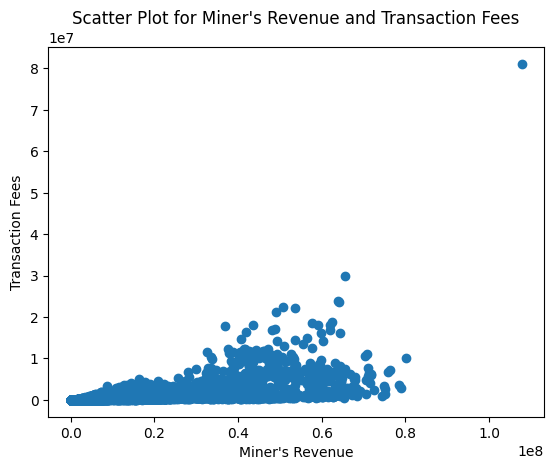

In [ ]:
plt.scatter(mirev['value'], trfus['value'])
plt.xlabel("Miner's Revenue")
plt.ylabel('Transaction Fees')
plt.title("Scatter Plot for Miner's Revenue and Transaction Fees")
plt.show()

Observations:

* Most data points are clustered in the lower ranges of both Miner’s Revenue and Transaction Fees.

* There appears to be a positive correlation between Miner's Revenue and Transaction Fees, as the points seem to form a broad upward trend. However, the correlation is not strong, indicated by the spread of points, particularly at higher values of Miner’s Revenue where Transaction Fees do not show a consistent pattern of increase.

* The majority of the points are densely packed in the lower-left corner of the plot, suggesting that many instances have both low Miner’s Revenue and low Transaction Fees.

In [ ]:
cptra['Year'] = cptra['date'].dt.year
pivot_table2 = pd.pivot_table(cptra, values='value', index='Year', aggfunc='sum')
pivot_table2

,value
Year,
2009,0.0000
2010,458.6184
2011,2899.9024
2012,1303.2781
2013,5435.5522
2014,12188.6344
2015,3129.2161
2016,2592.1615
2017,11220.0485


In [ ]:
cptra = cptra[cptra['Year'] != 2009]

In [ ]:
len(cptra)

5297

In [ ]:
#calculating correlation between miner's revenue and cost per transaction.
corr = correlation1 = mirev['value'].corr(cptra['value'])
corr

0.9219927701185437

1. A correlation coefficient of 0.92 is very close to 1, indicating a very strong positive linear relationship.
This means that changes in one variable are closely associated with changes in the other variable.

2. The positive sign of the correlation coefficient indicates that as one variable increases, the other variable also tends to increase.
In this case, as the miner's revenue increases, the cost per transaction also increases.

3. A strong correlation suggests that when transaction fees (a component of miner’s revenue) increase, the cost per transaction also increases,
possibly due to higher demand for transaction processing during periods of high network activity.

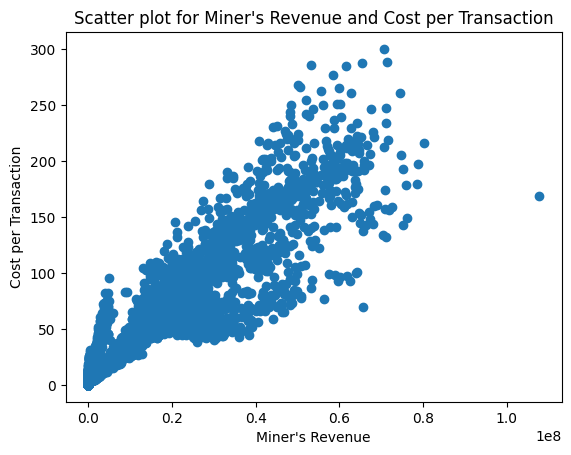

In [ ]:
plt.scatter(mirev['value'], cptra['value'])
plt.xlabel("Miner's Revenue")
plt.ylabel("Cost per Transaction")
plt.title("Scatter plot for Miner's Revenue and Cost per Transaction")
plt.show()

1. The plot shows a clear positive relationship between miner's revenue and cost per transaction.
As miner's revenue increases, the cost per transaction tends to increase as well.

2. The points are more densely clustered at lower levels of miner's revenue and cost per transaction.
This indicates that a majority of the data points fall within a lower range of these values.

3. As the values of miner's revenue and cost per transaction increase, the spread of the data points becomes wider.
This suggests more variability at higher levels.

4. There appear to be some outliers, particularly at higher values of miner's revenue and cost per transaction.
These points are further away from the main cluster and might represent unusual events or periods of high activity in the network.

5. The strong positive correlation and the visual trend suggest that when the network is more active
(e.g., higher transaction volumes, increased bitcoin price), both miner's revenue and transaction costs increase.

6. Miners are incentivized to prioritize transactions with higher fees, which directly impacts their revenue.
Therefore, during periods of high transaction volume, users may pay higher fees to get their transactions processed faster, contributing to the observed relationship.



In [ ]:
#correlation between average block size and number of transactions per block.
corr1 = avbls['value'].corr(ntrbl['value'])
corr1

0.9343518306375019

A correlation of 0.93 between the average block size and the number of transactions per block indicates a very strong positive relationship between these two variables.

1. A correlation coefficient of 0.93 is very close to 1, indicating an extremely strong positive linear relationship.
This suggests that changes in one variable are closely associated with changes in the other variable.

2. A strong correlation suggests that blocks with more transactions tend to be larger in size, which makes sense as more transactions require more data storage.

3. This strong correlation implies that the blockchain is efficiently utilizing its space.
Blocks are being filled with transactions up to their size limits.

4. A strong correlation suggests that blocks with more transactions tend to be larger in size,
which makes sense as more transactions require more data storage.

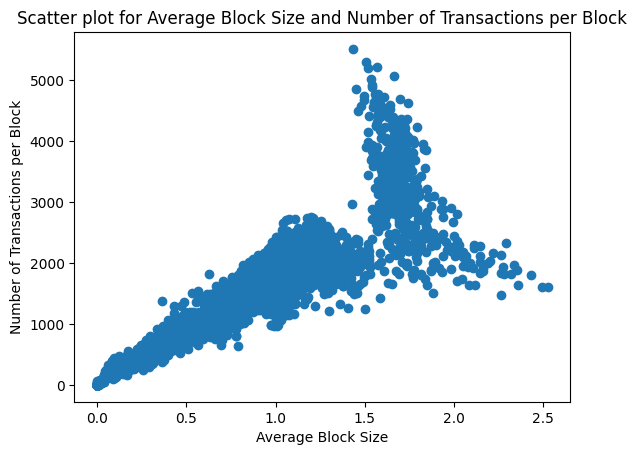

In [ ]:
plt.scatter(avbls['value'], ntrbl['value'])
plt.xlabel('Average Block Size')
plt.ylabel('Number of Transactions per Block')
plt.title('Scatter plot for Average Block Size and Number of Transactions per Block')
plt.show()

The plot shows a generally positive relationship between the average block size and the number of transactions per block.
As the average block size increases, the number of transactions per block also tends to increase.

* The data points are more densely clustered at lower values of average block size and number of transactions per block. This indicates that a majority of blocks have smaller sizes and fewer transactions.
As the average block size increases, the number of transactions per block also increases, but with more variability.

* While there is a strong positive correlation, the relationship appears to be non-linear.
There is a clear dense cluster around certain values, suggesting some limits or thresholds in the data.

* There are distinct clusters of data points, particularly around certain values of block size (e.g., around 1 MB and 2 MB) and transaction counts (e.g., around 1000-3000 transactions).
These clusters may indicate common operational ranges or constraints within the blockchain network.

* The strong positive correlation implies that as more transactions are included in a block, the block size naturally increases. This makes sense as each transaction adds data to the block
The clustering around specific values may reflect typical operational conditions or constraints in the blockchain protocol (e.g., maximum block size limits or common transaction batch sizes).

* The non-linear pattern suggests that there might be other factors at play influencing the block size and transaction count relationship, such as changes in transaction sizes or varying block capacities due to protocol updates.



In [ ]:
hrate['Year'] = hrate['date'].dt.year #creating a date column in the dataframe
#create pivot table aggreagted to the values for each year from 2009 to 2024.
pvt_tbl = pd.pivot_table(hrate, values='value', index='Year', aggfunc='sum')
pvt_tbl

,value
Year,
2009,0.000000e+00
2010,5.660500e+00
2011,2.323291e+03
2012,5.746914e+03
2013,5.431527e+05
2014,5.171858e+07
2015,1.481188e+08
2016,5.571386e+08
2017,2.308686e+09


In [ ]:
len(hrate)

5663

In [ ]:
len(diff)

5664

In [ ]:
#removing year 2009 from the data as it consists of zeros.
hrate = hrate[hrate['Year'] != 2009]

In [ ]:
hrate

,code,date,value,Year
0,HRATE,2023-09-12,3.795464e+08,2023
1,HRATE,2023-09-13,3.956973e+08,2023
2,HRATE,2023-09-14,4.360745e+08,2023
3,HRATE,2023-09-15,5.060618e+08,2023
4,HRATE,2023-09-16,4.172318e+08,2023
...,...,...,...,...
5658,HRATE,2023-09-06,3.644194e+08,2023
5659,HRATE,2023-09-07,3.930055e+08,2023
5660,HRATE,2023-09-08,3.580118e+08,2023
5661,HRATE,2023-09-09,4.064645e+08,2023


In [ ]:
diff['Year'] = diff['date'].dt.year #creating a year column in the dataframe
diff= diff[diff['Year'] != 2009] #removing the data for year 2009 since it contains zeros.

In [ ]:
#creating a pivot table with aggregated values for each year from 2009 to 2024.
pvt_tbl2 = pd.pivot_table(diff, values='value', index='Year', aggfunc='sum')
pvt_tbl2

,value
Year,
2010,6.171833e+05
2011,3.167777e+08
2012,7.778401e+08
2013,6.091343e+10
2014,6.725027e+12
2015,1.986889e+13
2016,7.492769e+13
2017,3.025798e+14
2018,1.814167e+15


In [ ]:
len(hrate)

5300

In [ ]:
len(diff)

5300

In [ ]:
#correlation between Bitcoin Hast rate and Bitcoin Difficulty
corr2 = hrate['value'].corr(diff['value'])
corr2


0.9933131485631981

A correlation of 0.993 between the hash rate and difficulty indicates an extremely strong positive relationship between these two variables.



* A strong correlation suggests that as more computational power is added to the network (increasing hash rate), the network automatically adjusts the difficulty upwards to maintain the block discovery rate.

* Higher hash rates generally indicate a more secure network because it becomes more difficult and expensive for any single entity to perform a 51% attack.

* As more miners join the network and the hash rate increases, the difficulty also increases, maintaining a consistent block production rate but making it harder for individual miners to find new blocks.

* The strong correlation reflects how economic incentives drive the hash rate and consequently the difficulty. When mining becomes more profitable (e.g., due to higher Bitcoin prices), more miners join the network, increasing the hash rate and driving up the difficulty.


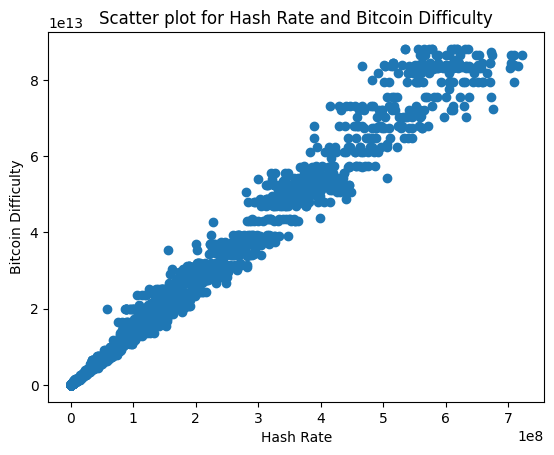

In [ ]:
plt.scatter(hrate['value'], diff['value'])
plt.xlabel('Hash Rate')
plt.ylabel('Bitcoin Difficulty')
plt.title('Scatter plot for Hash Rate and Bitcoin Difficulty')
plt.show()

The plot shows a clear and strong positive linear relationship between the hash rate and Bitcoin difficulty. As the hash rate increases, the difficulty also increases, consistent with the very high correlation coefficient of 0.993.

1. The data points are densely clustered along a linear trend, indicating that most of the observations fall within this strong relationship.
There is a consistent spread of points along the line, showing that as the hash rate increases, the difficulty scales accordingly.

2. The scatter plot visually confirms the near-perfect linear relationship. The trend line, if drawn, would closely follow the points, reaffirming the high correlation value.

3. The linear trend indicates that the Bitcoin network effectively adjusts the difficulty in response to changes in the hash rate to maintain a stable block discovery rate (typically every 10 minutes for Bitcoin).

4. As more miners join the network and increase the hash rate, the difficulty increases. This ensures that despite the higher computational power, blocks are not discovered too quickly, maintaining the intended pace of block creation.

5. The strong relationship can be driven by economic factors. When mining becomes more profitable (e.g., due to higher Bitcoin prices), more miners join, increasing the hash rate and subsequently the difficulty.

6. A higher hash rate and corresponding increase in difficulty make the network more secure against attacks, as it becomes more challenging and computationally expensive for any single entity to control the network.

In [ ]:
#finding a correlation between miner's revenue and bitcoin market prices.
corr5 = mirev['value'].corr(mkpru['value'])
corr5

0.92587050840497

The correlation coefficient between miners' revenue and the market prices of Bitcoin is approximately 0.93 (rounded to two decimal places). This value is close to 1, indicating a very strong positive correlation between the two variables. In practical terms, this means that as the market price of Bitcoin increases, miners' revenue tends to increase as well, and vice versa.
Possible Reasons behind this strong correlation:
* Miners' revenue is primarily derived from two sources: block rewards (newly minted bitcoins) and transaction fees. The block reward is a fixed number of bitcoins, which halves approximately every four years. Thus, the actual revenue from these block rewards is directly tied to the market price of Bitcoin. If the price of Bitcoin rises, the fiat value of the block reward also increases, leading to higher revenue for miners. Also when the network is congested, users may offer higher transaction fees to get their transactions prioritized. Higher Bitcoin prices often coincide with increased network activity, as investors trade more frequently, resulting in higher fees and, consequently, higher miner revenues.
* As the market price of Bitcoin rises, it often attracts more attention and participation in the market. More transactions and trading activities occur on the Bitcoin network, leading to higher transaction fees, which contribute to miners' revenue.Moreover, during bull markets, speculative investment increases, driving up both the price of Bitcoin and the activity on the network. This increased activity, in turn, increases the overall transaction fees that the miners collect.
* Market Efficiency: The strong correlation might also reflect the efficiency of the Bitcoin market. As Bitcoin prices rise, mining becomes more profitable, attracting more miners. Conversely, when prices fall, some miners may exit the market, reducing competition and stabilizing revenues. This feedback loop between price and mining activity helps maintain the strong correlation.

This correlation highlights the symbiotic relationship between Bitcoin's market performance and the financial incentives that drive the decentralized network's security and functionality.

## Various Analyses on the Bitcoin Data

1. Line Plot of Bitcoin Prices over the span of 16 years.

In [ ]:
mkpru['year'] = mkpru['date'].dt.year
mkpru

,code,date,value,year
0,MKPRU,2023-09-12,25162.70,2023
1,MKPRU,2023-09-13,25835.70,2023
2,MKPRU,2023-09-14,26227.98,2023
3,MKPRU,2023-09-15,26536.02,2023
4,MKPRU,2023-09-16,26605.75,2023
...,...,...,...,...
5665,MKPRU,2023-09-06,25785.30,2023
5666,MKPRU,2023-09-07,25753.31,2023
5667,MKPRU,2023-09-08,26243.47,2023
5668,MKPRU,2023-09-09,25906.03,2023


In [ ]:
mkpru1 = pd.pivot_table(mkpru, values='value', index='year', aggfunc='sum')
mkpru1

,value
year,
2009,0.000000e+00
2010,2.311020e+01
2011,2.205399e+03
2012,3.101530e+03
2013,6.933384e+04
2014,1.918440e+05
2015,9.935887e+04
2016,2.072969e+05
2017,1.450936e+06


In [ ]:
mkpru1.columns

Index(['value'], dtype='object')

In [ ]:
mkpru1.head()

,value
year,
2009,0.0000
2010,23.1102
2011,2205.3993
2012,3101.5303
2013,69333.8369


In [ ]:
mkpru1 = mkpru1.reset_index()

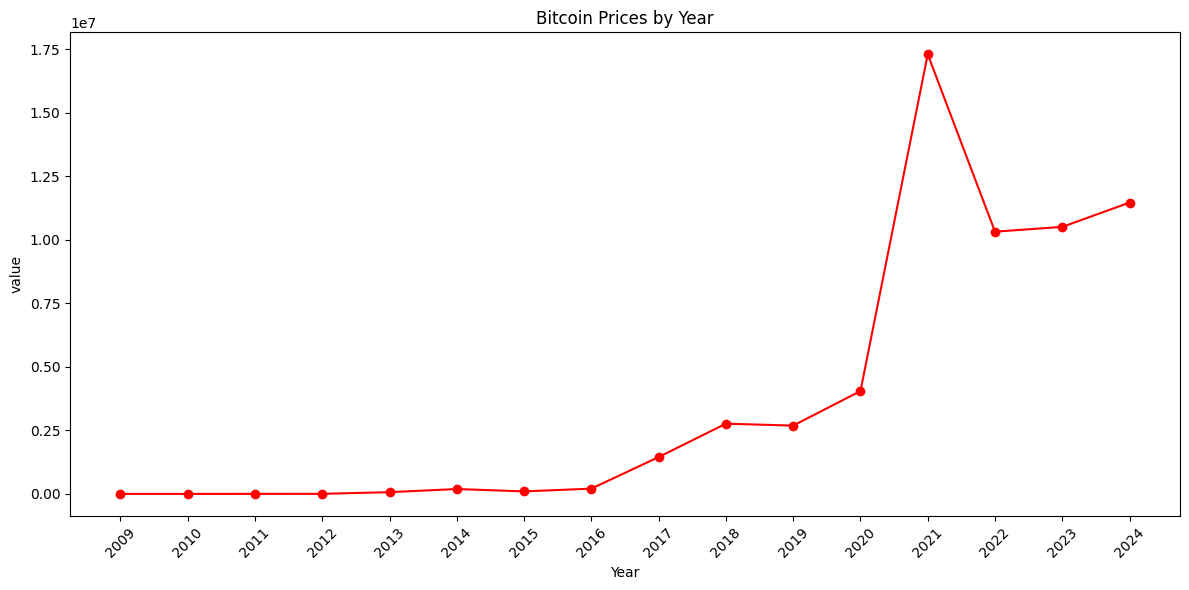

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mkpru1['year'], mkpru1['value'], marker='o', linestyle='-', color='r')
plt.title('Bitcoin Prices by Year')
plt.xlabel('Year')
plt.ylabel('value')
plt.grid(True)
plt.xticks(mkpru1['year'], rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()# Adjust layout to fit labels
plt.grid(False)
plt.show()

The graph displays a line chart showing Bitcoin prices by year from 2009 to 2024.
1. During the period of 2009-2016 bitcoin prices remained relatively low and stable. This could be because bitcoin was in its infancy during this period. It was primarily known within niche tech and cryptography communities only. The low and stable prices reflect the limited adoption in the masses and lack of mainstream interest.
2. In 2017-2018 there was a noticeable increase in bitcoin prices.This period marked the beginning of significant public and media attention towards bitcoins and other cryptocurrencies. Factors that could contribute to this price rise would be:
   
--> Increased media coverage and public awareness.

--> Entry of institutional investors in bitcoin and cryptocurrency market.

--> Expansion of cryptocurrency exchanges, making it easier for people to buy and sell Bitcoin.

-->  Speculative investments driving up the prices.

3. While in 2019-2020, prices continued to rise significantly, with a sharp spike occurring around 2021. While in 2020 The COVID-19 pandemic led to economic uncertainty, prompting investors to look for alternative assets, such as Bitcoin, as a store of value. Whereas in 2021,institutional adoption of bitcoins surged, with companies like Tesla announcing significant bitcoin purchases and plans to accept bitcoin as payment. Additionally, increasing adoption by payment platforms like PayPal allowed more users to buy and sell Bitcoins.Overall the bullish market sentiment and speculation further fueled the price increase.
4. The highest point on the graph is around 2021, indicating a peak in bitcoin prices. This peak could have resulted from the speculative frenzy created by the investors.Also probably the perceived scarcity of the bitcoin availability might have created a demand-supply imbalance.
5. After the peak, there was a significant drop in prices around 2022, followed by a period of relative stability with slight increases in the following years. In 2022 the bitcoin bubble burst asthe regulatory concerns and actions by the government added to the market uncertainity. Concerns over the environmental impact of  bitcoin mining also added to the drop in prices.
6. Stability and slight increases in bitcoin prices was seen in 2023-2024.Technological advancements and broader adoption of blockchain technology also contributed to the gradual increase in prices.
    

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


2. ARIMA Model for Bitcoin Market Prices

In [ ]:
#importing necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# creating a year column
mkpru['year'] = mkpru['date'].dt.year


In [ ]:
print(mkpru.columns)

Index(['code', 'date', 'value', 'year'], dtype='object')


In [ ]:
fg_yearly = mkpru.groupby('year')['value'].mean().reset_index()

In [ ]:
fg_yearly = fg_yearly.reset_index(drop=True)

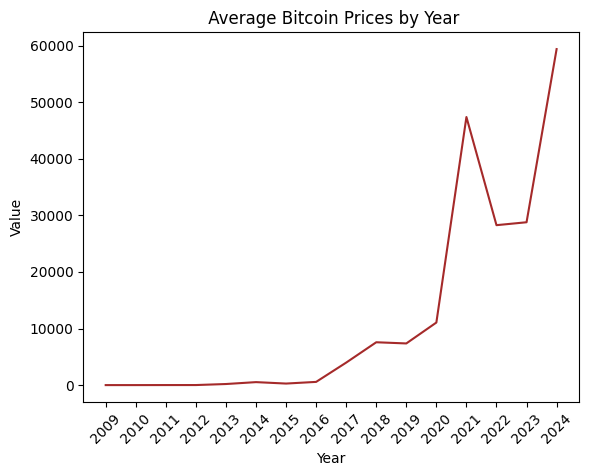

In [ ]:
#plotting the average yearly bitcoin market prices.

plt.plot(fg_yearly['year'], fg_yearly['value'], linestyle='-', color='brown')
plt.title(' Average Bitcoin Prices by Year')
plt.ylabel('Value')
plt.xlabel('Year')
plt.xticks(fg_yearly['year'], rotation=45)
plt.show()


Observations:
The above graph shows the average bitcoin prices from 2009 to 2024.
* From the year 2009 to 2015 bitcoin remained relatively low-valued, where it started gaining traction from 2014 with the prices picking up at a slower pace.
* A noticeable increase in the bitcoin in 2016 and 2017 can be seen with the growing mainstream awareness and institutional interest in the world of cryptocurrency.
* From 2018 to 2021 we can see more increase in the prices as the institutional investors entering the cryptocurrency market. Moreover the Covid-19 pandemic brought a wave of digitalisation with even small investors getting interested in investing in bitcoins.
* In 2022 the market corrected itself from a great peak and hence there was a significant drop in the bitcoin prices. During that year a lot of regulatory changes took place and environmental concerns over mining arose. Moreover the market itself was in a economic slowdown to reap up the effects of the pandemic.
* The graph then shows a recovery in the bitcoin prices which suggests that the confidence of market in cryptocurrency renewed. Additionally factors such as potential approval of bitcoins ETFs and growing mainstream acceptance also helped in raising the bitcoin prices.

In [ ]:
from statsmodels.tsa.stattools import adfuller
# conducting ADF test to check for stationary
result = adfuller(fg_yearly['value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Data is non-stationary. Differencing required.")
else:
    print("Data is stationary. No differencing required.")

ADF Statistic: 1.7774712705142404
p-value: 0.9983032725461417
Data is non-stationary. Differencing required.


Augmented Dickey- Fuller Test was ran to check whether the time-series data is stationary or not. From the results we can know that:
* The ADF statistic (1.777) is higher than the critical values for common significance levels, further supporting non-stationarity nature of the data.
* The p-value is 0.998, which is much greater than 0.05, and this high p-value indicates that we fail to reject the null hypothesis. Therefore, the data is non-stationary.

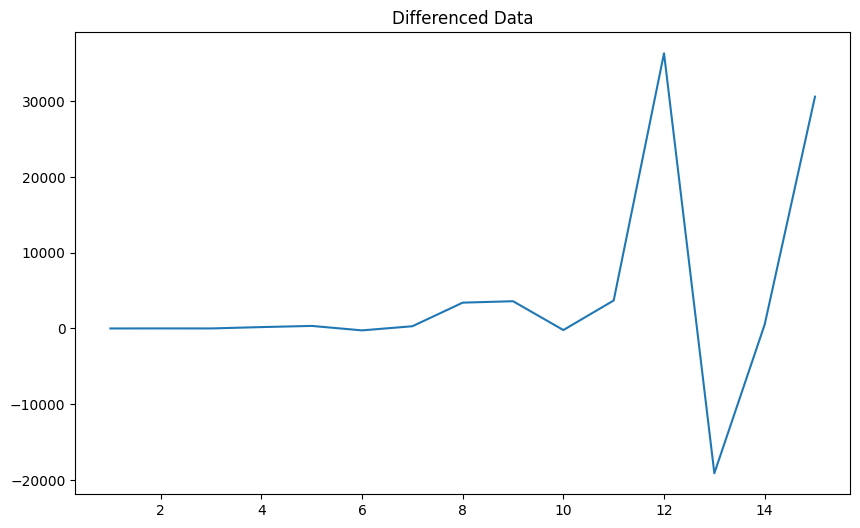

In [ ]:
fg_yearly['Value_diff'] = fg_yearly['value'].diff().dropna()

# Plotting the differenced data
fg_yearly['Value_diff'].plot(title='Differenced Data', figsize=(10, 6))
plt.show()

This plot shows the differenced data, which is the result of applying differencing to the original time series to remove trends or seasonality and make the data stationary.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# creating ARIMA Model
model = ARIMA(fg_yearly['value'], order=(1, 1, 1))
model_fit = model.fit()

# Printing the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -163.582
Date:                Fri, 17 Jan 2025   AIC                            333.163
Time:                        19:58:30   BIC                            335.287
Sample:                             0   HQIC                           333.141
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7895      0.932     -0.847      0.397      -2.616       1.037
ma.L1          0.9336      0.977      0.956      0.339      -0.981       2.848
sigma2      2.125e+08   2.14e-08   9.91e+15      0.0

Observations:
* The AR.L1 Coefficient is -0.7895 with the p-value of 0.397 indicates the impact of first lagged value in current price but a higher p value indicates that it is statistically insignificant.
* The MA.L1 Coefficient is 0.9336 with the p- value of 0.339 which suggests a strong positive relationship wityh residual errors.
* The Sigma value or the Variance of errors value show high volatility which is consistent with the bitcoins known price swinging trends.

Conclusions:
* The significant volatility (large sigma2) and near-singular covariance matrix indicate that generating meaningful forecasts about Bitcoin values will be difficult. Businesses should use caution when using these estimates to make investment or strategic choices.
* The substantial heteroskedasticity implies unpredictable price changes and volatality risks, stressing the importance of risk mitigation techniques, such as hedging or diversification, for those engaged in Bitcoin trading or investment.
* The differencing indicates that Bitcoin's price trajectory is strongly trend-driven. This suggests that broader economic trends, regulatory changes, or market opinion are likely important driving forces. Businesses should be mindful of macroeconomic statistics and public mood.


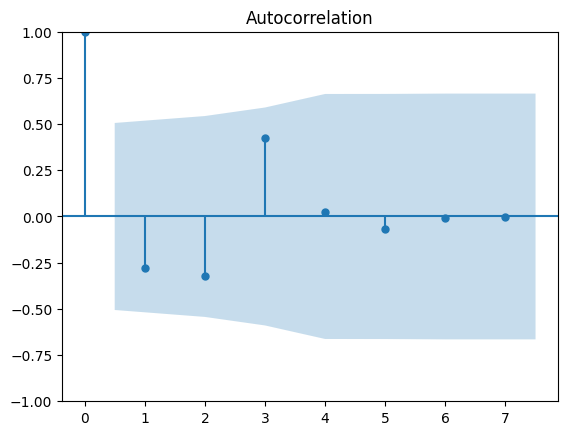

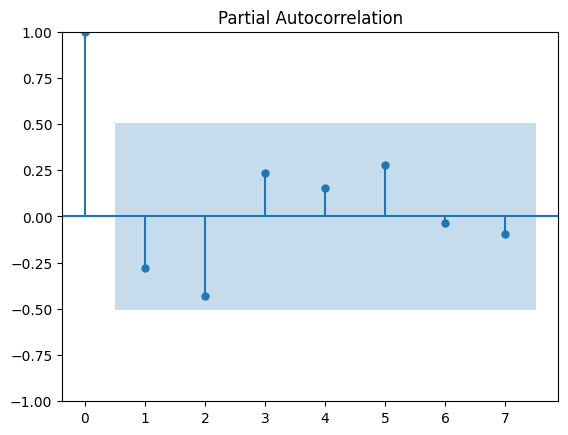

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF for the differenced data
plot_acf(fg_yearly['value'].diff().dropna())
plot_pacf(fg_yearly['value'].diff().dropna())
plt.show()

In [ ]:
#installing the pmdarima library
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
#running the auto arima model to hypertune the original model.
auto_model = auto_arima(fg_yearly['value'], seasonal=False, trace=True)
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=330.088, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=330.435, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=332.646, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=329.508, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=332.353, Time=1.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.596 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -163.754
Date:                Fri, 17 Jan 2025   AIC                            329.508
Time:                        19:58:38   BIC                            330.216
Sample:                             0   HQIC                           329.500
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.663e+08   3.66e+07      4.543      0.000    9.46e+07  

Observations:
* There are no AR or MA coefficients estimated in this model due to the it's simplified structure.
* The Sigma value is still high, it's slightly lower than the earlier model (2.125e+08), suggesting a slight reduction in unexplained variance/volatility.
Conclusions:
* The simplified model suggests that future prices are heavily influenced by trends and external factors, not past observations or residual patterns. Thus, businesses should avoid over-relying on short-term price forecasts.
* Price changes seem to be highly volatile and heteroskedastic, implying great uncertainty. Businesses (such as exchanges, miners, and investors) should plan for rapid price swings and include hedging or reserves in their business plans.

However we can see that, both models highlight challenges in capturing Bitcoin's volatile nature. Businesses may require more sophisticated models (e.g., GARCH, regime-switching models) for actionable insights.


In [ ]:
forecast = model_fit.forecast(steps=4)  # Forecast 2025-2028
forecast_years = list(range(2025, 2029))
forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecast': forecast})
forecast_df.set_index('Year', inplace=True)
print(forecast_df)

          Forecast
Year              
2025  57824.799013
2026  59061.162488
2027  58085.019927
2028  58855.711005


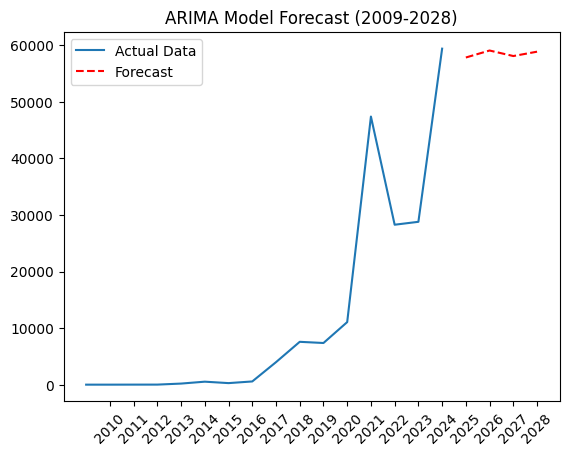

In [ ]:
# Plot the actual data and forecast
plt.plot(fg_yearly['year'], fg_yearly['value'], label='Actual Data')
plt.plot(forecast_years, forecast, label='Forecast', color='red', linestyle='--')
plt.xticks(ticks=range(2010, 2029), labels=range(2010, 2029), rotation=45)
plt.legend()
plt.title('ARIMA Model Forecast (2009-2028)')
plt.show()

The above data and plot shows the future forecasts for the bitcoin prices from 2025 to 2028.

------------------------------------------------------------------------------------

3. Simple and Exponential Moving Average for Bitcoin Market Prices.

In [ ]:
window_size = 200 # Sets the window size for the moving average
mkpru['SMA'] = mkpru['value'].rolling(window=window_size).mean() #This calculates the simple moving average over a rolling window of 200 periods.

In [ ]:
span = 200 # Sets the span for the exponential moving average to 200.
mkpru['EMA'] = mkpru['value'].ewm(span=span, adjust=False).mean() #This calculates the exponential moving average with a span of 200 periods.
#The adjust=False parameter specifies that the weights are not adjusted for bias.

In [ ]:
#creating a pivot table with bitcoin prices, SMA and EMA
mkpru2 = pd.pivot_table(mkpru, values=['value','SMA','EMA'], index='year', aggfunc='sum')
mkpru2

,EMA,SMA,value
year,,,
2009,5.519589e+06,6.170977e+06,0.000000e+00
2010,1.449449e+05,5.695608e+00,2.311020e+01
2011,5.441477e+03,1.711073e+03,2.205399e+03
2012,2.649201e+03,2.414259e+03,3.101530e+03
2013,3.285368e+04,2.908362e+04,6.933384e+04
2014,1.873629e+05,1.936242e+05,1.918440e+05
2015,1.094578e+05,1.066757e+05,9.935887e+04
2016,1.724661e+05,1.697846e+05,2.072969e+05
2017,7.787814e+05,6.996315e+05,1.450936e+06


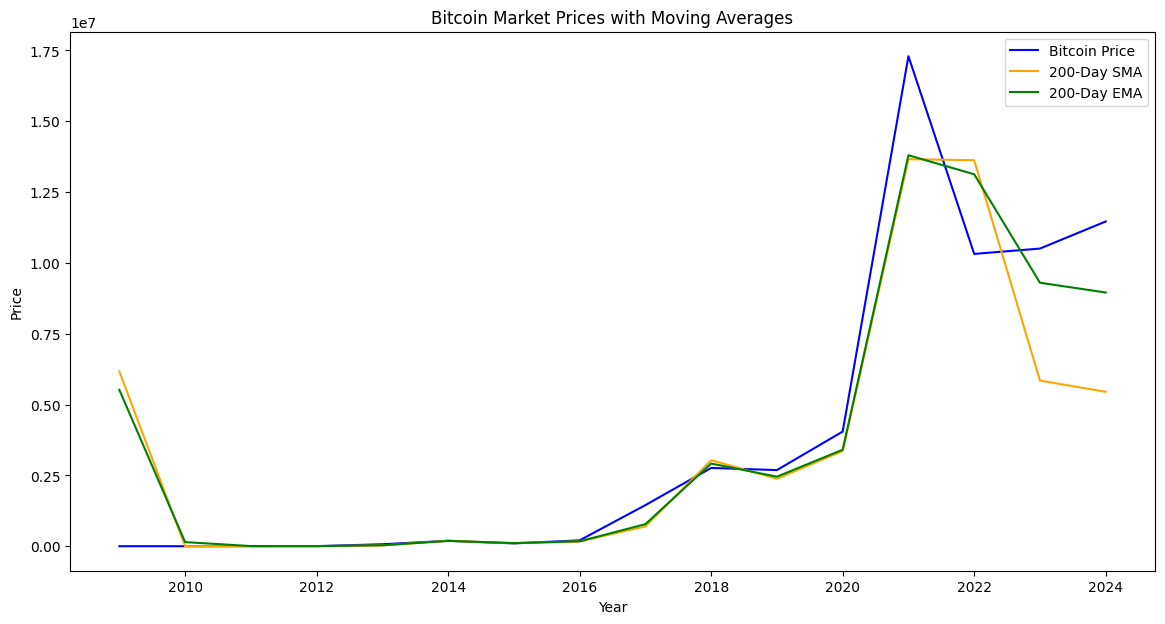

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(mkpru2['value'],label='Bitcoin Price', color='blue')
plt.plot(mkpru2['SMA'], label=f'{window_size}-Day SMA', color='orange')
plt.plot(mkpru2['EMA'], label=f'{span}-Day EMA', color='green')
plt.title('Bitcoin Market Prices with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(False)
plt.show()

Observations:

* SMA(Simple Moving Average):The SMA reacts more slowly to price changes, which is evident during Bitcoin's steep rise in 2020–2021, where it lags behind the actual price. The SMA falls sharply during the post-2021 decline, highlighting its delayed response to market downturns.
* EMA(Exponential Moving Average): EMA reacts more quickly to price changes compared to the SMA.The EMA closely follows the price during volatile periods (2020–2022), offering a more responsive trend indicator for recent price movements.
* During rapid price increases (e.g., 2020–2021), the EMA tends to stay closer to the price, while the SMA lags behind, showing divergence.Post-2021, the SMA and EMA converge during the decline, indicating alignment in the overall bearish trend.

In conclusion, while the graph highlights Bitcoin’s dramatic growth and inherent instability, businesses can leverage moving averages to navigate trends, adjust strategies, and capitalize on opportunities in the volatile bitcoin market.

-----------------------------------------------------------------------------------------------------------------------------

4. Relative Strenght Index for Bitcoin Market Prices

In [ ]:
def calculate_rsi(data, window):
    # Calculating the difference in price from the previous step
    delta = mkpru['value'].diff()

    # Calculating the gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculating the average gain and loss
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculating the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculating the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [ ]:
#adding the RSI column in the dataframe
mkpru['RSI'] = calculate_rsi(mkpru, 14)
print(mkpru)

       code       date     value  year          SMA           EMA         RSI
0     MKPRU 2023-09-12  25162.70  2023          NaN  25162.700000         NaN
1     MKPRU 2023-09-13  25835.70  2023          NaN  25169.396517  100.000000
2     MKPRU 2023-09-14  26227.98  2023          NaN  25179.929686  100.000000
3     MKPRU 2023-09-15  26536.02  2023          NaN  25193.423122  100.000000
4     MKPRU 2023-09-16  26605.75  2023          NaN  25207.476126  100.000000
...     ...        ...       ...   ...          ...           ...         ...
5665  MKPRU 2023-09-06  25785.30  2023  27546.02985  27081.684946   47.387092
5666  MKPRU 2023-09-07  25753.31  2023  27557.07305  27068.467284   42.445102
5667  MKPRU 2023-09-08  26243.47  2023  27565.42555  27060.258356   50.833061
5668  MKPRU 2023-09-09  25906.03  2023  27571.74600  27048.773497   48.538981
5669  MKPRU 2023-09-11  25832.82  2023  27579.45920  27036.674457   48.241794

[5670 rows x 7 columns]


In [ ]:
#grouping the RSI values for each year
mt = mkpru.groupby('year')['RSI'].mean().reset_index()
mt

,year,RSI
0,2009,8.436684
1,2010,55.193134
2,2011,51.462836
3,2012,55.993473
4,2013,60.021352
5,2014,44.900252
6,2015,52.778057
7,2016,58.983495
8,2017,64.494843
9,2018,43.618461


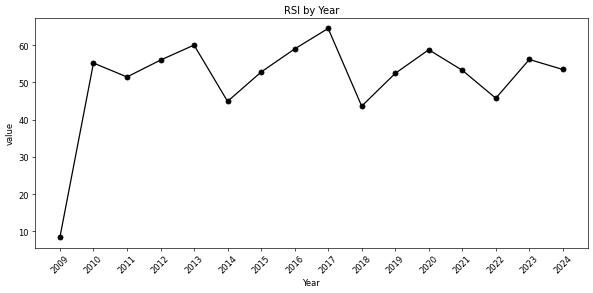

In [ ]:
#plotting the RSI of Bitcoin Market Prices for each year.
plt.figure(figsize=(10,5), dpi=60)
plt.plot(mt['year'], mt['RSI'],marker ='o', linestyle='-', color='black')
plt.title('RSI by Year')
plt.xlabel('Year')
plt.ylabel('value')
plt.xticks(mt['year'], rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

Observations:
This plot illustrates the annual average Relative Strength Index (RSI) for Bitcoin from years 2009 to 2024.

* In the initial growth period from 2009 to 2013, there was a significant increase in average RSI from being below 20 to going above 60 by 2013 which reflects Bitcoin's rapid adoption and strong bullish momentum during its early years.
* RSI stabilizes in the 50–60 range during this 2014 to 2017, peaking above 60 in 2017, corresponding to the major bull run in Bitcoin prices. This period also includes corrections (e.g., 2014 and 2018) that brought RSI values closer to 50, signaling a reduced bullish momentum. The RSI levels near 50–60 suggest a moderately overheated market, offering both risks and opportunities for strategic investments.
* From 2018 to 2024, RSI fluctuates around 50–60, with noticeable dips in years like 2018 and 2022, indicating bearish conditions.Despite these corrections, RSI remains above 40 for most years, signaling persistent bullish momentum over the long term.

Thus, the chart highlights Bitcoin’s cyclical behavior, with alternating periods of bullish and bearish momentum. High RSI years (e.g., 2017, 2021) reflect speculative bubbles, while dips (e.g., 2018, 2022) indicate corrections following these peaks.



-----------------------------------------------------------------------------------------------------------------------------

5. Sharpe Ratio

In [ ]:
df1 = pd.DataFrame(mkpru1)

# Exclude 2009 (outlier)
df1 = df1[df1["year"] > 2009]

# Calculate annual returns
df1["Return"] = df1["value"].pct_change()

# Risk-free rate (annualized)
risk_free_rate = 0.02 # 2%

# Calculate Sharpe Ratio
average_return = df1["Return"].mean()
std_dev_return = df1["Return"].std()
sharpe_ratio = (average_return - risk_free_rate) / std_dev_return

# Display results
print(f"Average Return: {average_return:.4f}")
print(f"Volatility (Standard Deviation): {std_dev_return:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Average Return: 9.2088
Volatility (Standard Deviation): 25.1739
Sharpe Ratio: 0.3650


Interpretation:

Average Return: Bitcoin investment provided an average return of 9.21% during this time period.

Volatility: A 25.17% standard deviation highlights Bitcoin’s well-known high volatility.

Sharpe Ratio: Assuming a negligible risk-free rate, the Sharpe ratio of 0.365 indicates the level of excess return per unit of risk.

Observations:
* The high volatility of Bitcoin significantly reduces the attractiveness of its average returns on a risk-adjusted basis, i.e, while Bitcoin offers relatively high average returns (9.21%), these returns are heavily counterbalanced by the high volatility, resulting in a lower Sharpe ratio.

* Bitcoin’s low Sharpe ratio suggests it should not be the sole asset in a portfolio. However, due to its high returns, it could serve as a high-risk/high-reward component in a diversified portfolio.
* Given the high volatility, businesses and investors should focus on a long-term perspective, expecting large price swings but potential strong returns over extended periods.


------------------------------------------------------------------------------------------------------------------------------

6. Average Cost of Transacting a Bitcoin

In [ ]:
#calculating mean for cost per transaction.
m = cptra['value'].mean()
m

45.78837370209553

On an average the cost for transacting a bitcoin is around $45.7

---------------------------------------------------------------------------------------------------------------------------------

7. Average Bitcoin Transaction over the Years

In [ ]:
ntran

,code,date,value
0,NTRAN,2023-09-12,462328
1,NTRAN,2023-09-13,512446
2,NTRAN,2023-09-14,576215
3,NTRAN,2023-09-15,703692
4,NTRAN,2023-09-16,593144
...,...,...,...
5659,NTRAN,2023-09-06,485357
5660,NTRAN,2023-09-07,537939
5661,NTRAN,2023-09-08,414799
5662,NTRAN,2023-09-09,597409


In [ ]:
ntran['Year'] = ntran['date'].dt.year

In [ ]:
trans = ntran.groupby('Year')['value'].sum().reset_index()

In [ ]:
trans

,Year,value
0,2009,32324
1,2010,187869
2,2011,1897485
3,2012,8356775
4,2013,19651687
5,2014,25289119
6,2015,45648444
7,2016,82788900
8,2017,104157345
9,2018,81392592


In [ ]:
tots = totbc.groupby('Year')['value'].sum().reset_index()

In [ ]:
tots

,Year,value
0,2009,3.102682e+08
1,2010,1.202006e+09
2,2011,2.412184e+09
3,2012,3.430082e+09
4,2013,4.154770e+09
5,2014,4.731324e+09
6,2015,5.235535e+09
7,2016,5.725331e+09
8,2017,5.995057e+09
9,2018,6.250530e+09


In [ ]:
w= tots['value']/trans['value']

In [ ]:
w

,value
0,9598.694469
1,6398.107458
2,1271.253001
3,410.455250
4,211.420531
5,187.089305
6,114.692513
7,69.155783
8,57.557695
9,76.794824


In [ ]:
years = list(range(2009, 2024 + 1))

# Replace the index of the DataFrame with the list of years
w.index = years

# Rename the index to 'year' and the column to 'value'
w.index.name = 'Year'
w.columns = ['Value']

# Reset the index to turn 'year' into a column if needed
w = w.reset_index()

# Display the DataFrame
print(w)

    Year        value
0   2009  9598.694469
1   2010  6398.107458
2   2011  1271.253001
3   2012   410.455250
4   2013   211.420531
5   2014   187.089305
6   2015   114.692513
7   2016    69.155783
8   2017    57.557695
9   2018    76.794824
10  2019    54.224042
11  2020    59.823960
12  2021    69.983464
13  2022    74.812498
14  2023    46.199036
15  2024    41.014801


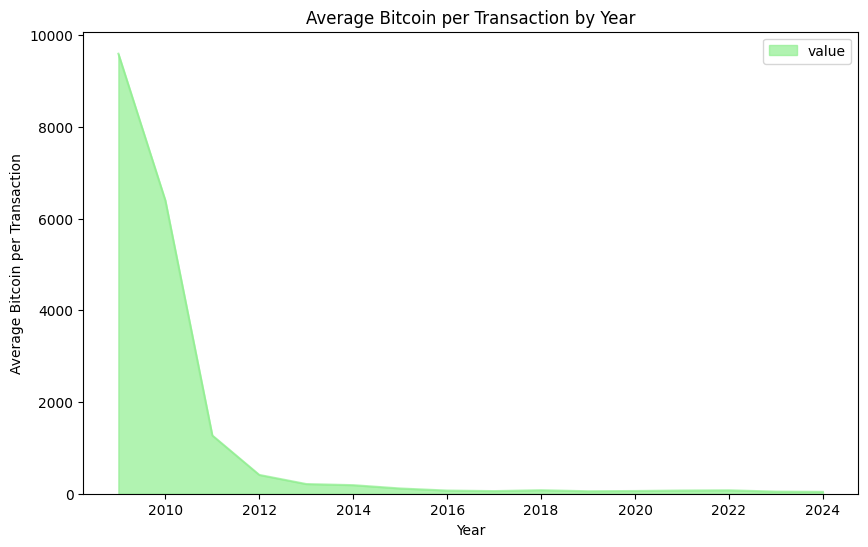

In [ ]:
#plotting the area chart for average bitcoin per transaction per year.
w.plot(kind='area', x='Year', y='value', color='lightgreen', alpha=0.7, figsize=(10, 6))
plt.title('Average Bitcoin per Transaction by Year')
plt.ylabel('Average Bitcoin per Transaction')
plt.xlabel('Year')
plt.show()

The ratio tries to calculate the average amount of bitcoin per transaction for each year.
* The values are extremely high, particularly in 2009 and 2010, indicating that during Bitcoin's early years, each transaction involved a large amount of Bitcoin on average. This is consistent with the early adoption phase, where only a few people were using Bitcoin, and the prices were very low.
* During the period of 2011 to 2012,there is a significant drop in the average Bitcoin per transaction, which suggests that as Bitcoin gained popularity, the number of transactions increased, and the amount of Bitcoin involved in each transaction decreased.
* From 2013 to 2015,the ratio continues to decrease, reflecting a trend where Bitcoin transactions are becoming more frequent, but with smaller amounts per transaction. This could be due to increasing adoption and the rising value of Bitcoin, making smaller transactions more common.
* There is a slight increase in 2016 and 2017, which might be attributed to fewer, larger transactions or possibly the use of Bitcoin in large-value transfers.
* From 2018 to 2024,the ratio continues to fluctuate at lower levels, indicating a more stabilized average transaction size, reflecting the maturing of the Bitcoin market.

----------------------------------------------------------------------------------------------------------------------------------------------------

8. Ratio of Bitcoin Transaction and Transaction Fees.

In [ ]:
trfee


,code,date,Year,value
0,TRFEE,2023-09-12,2023,31.0294
1,TRFEE,2023-09-13,2023,31.1287
2,TRFEE,2023-09-14,2023,30.8977
3,TRFEE,2023-09-15,2023,32.6180
4,TRFEE,2023-09-16,2023,26.7010
...,...,...,...,...
5659,TRFEE,2023-09-06,2023,30.2539
5660,TRFEE,2023-09-07,2023,31.5701
5661,TRFEE,2023-09-08,2023,35.8546
5662,TRFEE,2023-09-09,2023,32.5305


In [ ]:
totbc

,code,date,value,Year
0,TOTBC,2023-09-12,19483681.25,2023
1,TOTBC,2023-09-13,19484475.00,2023
2,TOTBC,2023-09-15,19486643.75,2023
3,TOTBC,2023-09-14,19485618.75,2023
4,TOTBC,2023-09-16,19487693.75,2023
...,...,...,...,...
5662,TOTBC,2023-09-06,19478256.25,2023
5663,TOTBC,2023-09-07,19479168.75,2023
5664,TOTBC,2023-09-08,19479900.00,2023
5665,TOTBC,2023-09-09,19480756.25,2023


In [ ]:
#Ratio of Average transaction fee paid per Bitcoin transacted for all the years
trfee['value'].sum()/totbc['value'].sum()

3.8266169584719115e-06

In [ ]:
#Ratio of the number of Bitcoins transacted per unit of transaction fee paid.
totbc['value'].sum()/trfee['value'].sum()

261327.43644122966

Observations:

The ratio of the number of Bitcoins transacted per unit of transaction fee paid which is approximately 261,327.44, indicates that, on average, a significant amount of Bitcoin (over 261,000 Bitcoins) is transacted for every unit of transaction fee paid. This high ratio reflects the efficiency of the Bitcoin network in handling large transactions with relatively low fees per Bitcoin. When considered alongside the very small average transaction fee per Bitcoin(3.82),it becomes clear that while the total transaction fees might seem substantial, they are quite minimal when spread across the total amount of Bitcoin transacted. This efficiency is likely a key factor in the continued use of Bitcoin for large-scale value transfers.